In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
data=pd.read_csv("loan_approved.csv")
df=pd.DataFrame(data)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### Knowing the count of missing values in each column

In [4]:
df.isna().sum()

Loan_ID                    0
Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

#### A missing value should NEVER be imputed by looking at just one feature.
#### A person (or data row) may be low in one feature but strong in another, so you need MULTI-FEATURE analysis.

### Numerical

* ApplicantIncome

* CoapplicantIncome

* LoanAmount (has missing values)

* Loan_Amount_Term (might have missing)

* Credit_History

### Categorical

* Gender

* Married

* Dependents

* Education

* Self_Employed

* Property_Area

* Loan_Status (Approved: Y/N)

####  LoanAmount is the main missing-value column
##### When LoanAmount is missing, these features help identify its logical value:

* ApplicantIncome

* CoapplicantIncome

* Credit_History

* Property_Area

* Loan_Status (as hue)

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

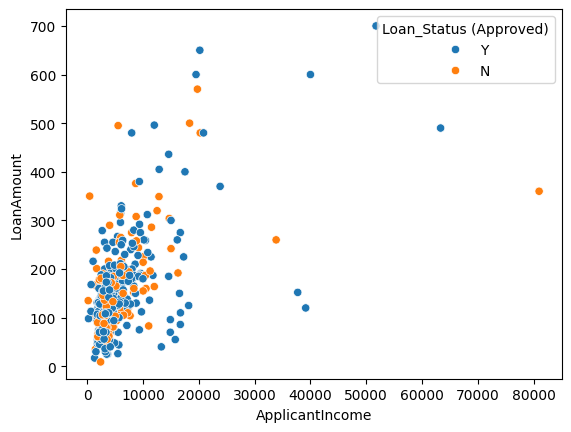

In [5]:
sns.scatterplot(data=df, x='ApplicantIncome', y='LoanAmount', hue='Loan_Status (Approved)')

### Most of the data lies in:

#### ApplicantIncome: 0 to 10,000

#### LoanAmount: 100 to 200

#### In this region:

#### Both Y (approved) and N (not approved) points are very close.
#### This means approval status doesn’t drastically change the loan amount in this income band.

#### 

<Axes: xlabel='CoapplicantIncome', ylabel='LoanAmount'>

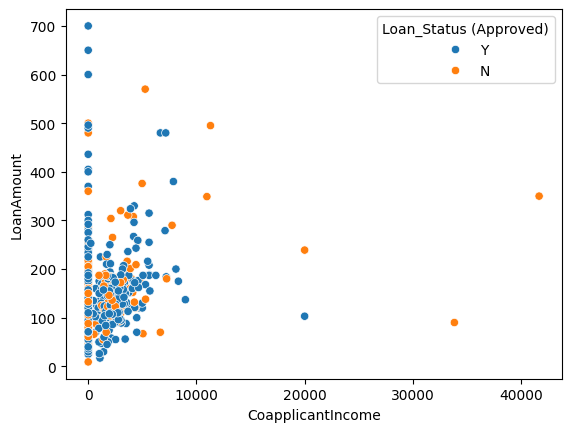

In [6]:
sns.scatterplot(data=df, x='CoapplicantIncome', y='LoanAmount', hue='Loan_Status (Approved)')

#### Insight summary:

If coapplicant income = 0, the expected loan amount is around 100–180, median around 130.

If coapplicant income is high, loan amount might be 150–300+, but this pattern is weak because of very few points.

What this plot contributes:

CoapplicantIncome alone does NOT push LoanAmount much unless it's extremely high.

<Axes: xlabel='Credit_History', ylabel='LoanAmount'>

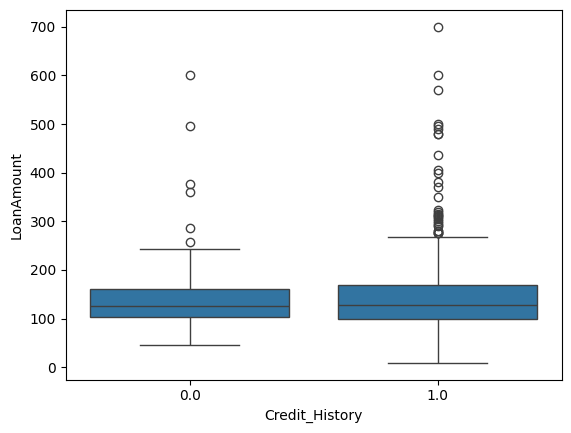

In [7]:
sns.boxplot(data=df, x='Credit_History', y='LoanAmount')

#### Observations:

Credit_History = 1.0 borrowers take slightly higher loans

Median around 140–150

Credit_History = 0.0 borrowers take slightly lower loans

Median around 110–120

The difference is not huge but consistent.

<Axes: xlabel='Property_Area', ylabel='LoanAmount'>

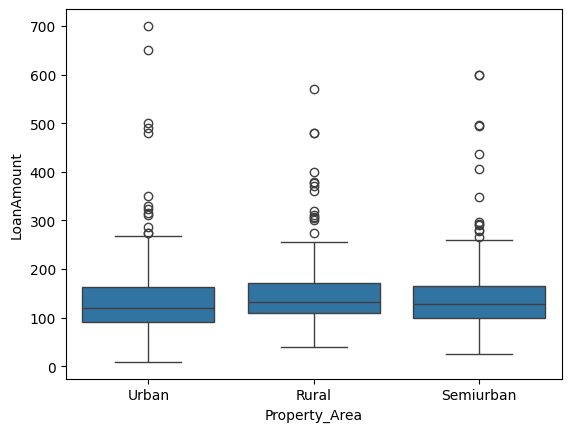

In [8]:
sns.boxplot(data=df, x='Property_Area', y='LoanAmount')

Insight summary:

If Property_Area = Urban, increase estimate slightly

If Rural, decrease slightly

Semiurban stays in the middle

What this contributes:

In [13]:
import pandas as pd

df = pd.read_csv('loan_approved.csv')

# Step 1: Create income bands
df['income_band'] = pd.qcut(df['ApplicantIncome'], 4, labels=['low','mid_low','mid_high','high'])

# Step 2: Store which rows were originally missing
missing_rows = df[df['LoanAmount'].isna()].copy()

# Step 3: Impute LoanAmount using grouped median
df['LoanAmount'] = df.groupby(
    ['income_band', 'Credit_History', 'Property_Area'],
    observed=False
)['LoanAmount'].transform(lambda x: x.fillna(x.median()))

# Step 4: Show the filled rows
filled = df.loc[missing_rows.index, ['Loan_ID','ApplicantIncome','Credit_History','Property_Area','LoanAmount']]
filled


,Loan_ID,ApplicantIncome,Credit_History,Property_Area,LoanAmount
0,LP001002,5849,1.0,Urban,184.5
35,LP001106,2275,1.0,Urban,98.0
63,LP001213,4945,0.0,Rural,127.0
81,LP001266,2395,1.0,Semiurban,103.5
95,LP001326,6782,NaN,Urban,NaN
102,LP001350,13650,1.0,Urban,184.5
103,LP001356,4652,1.0,Semiurban,124.0
113,LP001392,7451,1.0,Semiurban,195.5
127,LP001449,3865,1.0,Rural,132.5
202,LP001682,3992,1.0,Urban,125.0


In [ ]:
import pandas as pd

df = pd.read_csv('loan_approved.csv')

# Create income bands
df['income_band'], bins = pd.qcut(
    df['ApplicantIncome'],
    4,
    labels=['low','mid_low','mid_high','high'],
    retbins=True
)

bins
